In [1]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
# Open the picture files .p format
# Data divided into training, validation (To perform cross validation to ensure model is not overfitting the data) and testing sets

with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
# Shape of the dataset 
# Result shows 32 * 32 pixel colored image (indicated by 3)

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [5]:
X_test, y_test = test['features'], test['labels']
print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [6]:
X_valid, y_valid = valid['features'], valid['labels']
print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


In [7]:
# PERFORM IMAGE VISUALIZATION

11

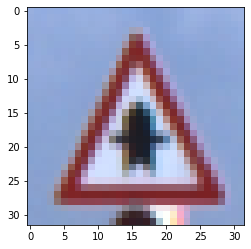

In [8]:
# Make sure that data and label makes sense
# Selecting a random input data and visualizing it

i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

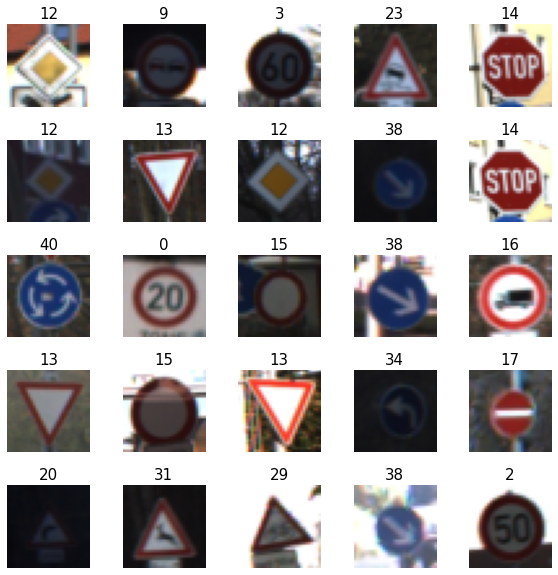

In [9]:
# Lets view more images in a grid format
# Define dimesions of plot grid (Width and length)
W_grid = 5 
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10, 10))
axes = axes.ravel() # Flatten the 5 * 5 matrix into 25 array
n_training = len(X_train) # Length of training dataset

# For loop to create a grid for us
for i in np.arange(0, W_grid * L_grid):
    # Select a random number from 0 to n_training
    index = np.random.randint(0, n_training)
    
    # Read and display an image with selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    
    # Clearing the axis off to visualize more clearly
    axes[i].axis('off') 
    
# Create spacing bet images
plt.subplots_adjust(hspace = 0.4)

In [10]:
# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
# We want the network to avoid learning order of images so we shuffle
# We do shuffling to make sure network does not learn order of images like 100 stop signs back to back

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
# Converting image from color to grayscale
# Dividing red, green and blue pixels so we divide by 3

X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

In [13]:
# Verifying the shape

X_train_gray.shape 
# We can see dim of 1 instead of 3, so only 1 single channel

(34799, 32, 32, 1)

In [14]:
# Normalize the images

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [15]:
X_train_gray_norm

# Instead of having pixel from 0 to 255, the data is now normalised

array([[[[ 0.203125  ],
         [ 0.109375  ],
         [-0.03645833],
         ...,
         [-0.59114583],
         [-0.73697917],
         [-0.7890625 ]],

        [[-0.015625  ],
         [-0.04947917],
         [-0.11197917],
         ...,
         [-0.58854167],
         [-0.6953125 ],
         [-0.73697917]],

        [[-0.1328125 ],
         [-0.19270833],
         [-0.21875   ],
         ...,
         [-0.58072917],
         [-0.67708333],
         [-0.69270833]],

        ...,

        [[-0.1875    ],
         [-0.28645833],
         [-0.375     ],
         ...,
         [-0.89322917],
         [-0.89322917],
         [-0.87760417]],

        [[-0.46354167],
         [-0.5625    ],
         [-0.625     ],
         ...,
         [-0.88802083],
         [-0.89322917],
         [-0.87760417]],

        [[-0.55989583],
         [-0.64583333],
         [-0.68489583],
         ...,
         [-0.87239583],
         [-0.87239583],
         [-0.859375  ]]],


       [[[-0.62760417],


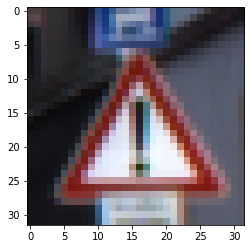

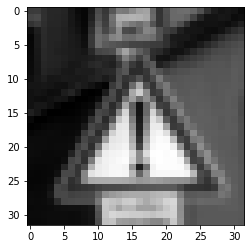

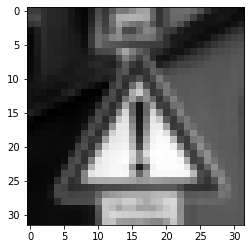

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train[i]) # Original image
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap='gray') # Gray scale image
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray') # Normalised image

In [17]:
# BUILD DEEP CONV NEURAL NETWORK FROM SCRATCH

In [18]:
from tensorflow.keras import datasets, layers, models

In [19]:
# We use keras api to build model
CNN = models.Sequential() # Build our model in sequential fashion

# Building 1st layer - Convolution layer with 6 kernels of size 5 * 5
CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1))) # Need 6 convolutions 

# Add 1st average pooling layer
CNN.add(layers.AveragePooling2D())

# Adding dropout
CNN.add(layers.Dropout(0.2))

# Building 2nd layer - Convolution layer with 16 kernels of size 5 * 5
CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu')) # No need to specify input_shape later

# Add 2nd average pooling layer
CNN.add(layers.AveragePooling2D())

# Take feature maps and flatten them up
CNN.add(layers.Flatten())

# Dense fully connected ANN layer
CNN.add(layers.Dense(120, activation = 'relu')) # 120 neurons
CNN.add(layers.Dense(84, activation = 'relu')) # Additional dense layer 84 neurons

# We need output layer to be 43 neurons as we are classifying 43 classes
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [20]:
# COMPILE AND TRAIN CNN MODEL

In [21]:
# We have more than 2 classes (43 classes) in this case, so we used sparse_categorical_crossentropy loss, 
# Else for binary we use loss = binary_crossentropy

CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Train the model
history = CNN.fit(X_train_gray_norm, 
                  y_train, 
                  batch_size = 500, 
                  epochs = 25, 
                  verbose = 1, 
                  validation_data = (X_valid_gray_norm, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 15s 426us/sample - loss: 3.1478 - accuracy: 0.1841 - val_loss: 2.6601 - val_accuracy: 0.2961
Epoch 2/25
34799/34799 [==============================] - 11s 326us/sample - loss: 1.8643 - accuracy: 0.4761 - val_loss: 1.4749 - val_accuracy: 0.5937
Epoch 3/25
34799/34799 [==============================] - 13s 361us/sample - loss: 1.1296 - accuracy: 0.6716 - val_loss: 0.9886 - val_accuracy: 0.7197
Epoch 4/25
34799/34799 [==============================] - 13s 361us/sample - loss: 0.7831 - accuracy: 0.7756 - val_loss: 0.7621 - val_accuracy: 0.7825
Epoch 5/25
34799/34799 [==============================] - 12s 357us/sample - loss: 0.6198 - accuracy: 0.8220 - val_loss: 0.6796 - val_accuracy: 0.8005
Epoch 6/25
34799/34799 [==============================] - 12s 333us/sample - loss: 0.5280 - accuracy: 0.8482 - val_loss: 0.6151 - val_accuracy: 0.8277
Epoch 7/25
34799/34799 [=====================

In [23]:
# ASSESS TRAINED CNN MODEL PERFORMANCE 

In [24]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 144us/sample - loss: 0.6605 - accuracy: 0.8853
Test accuracy: 0.8852731585502625


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

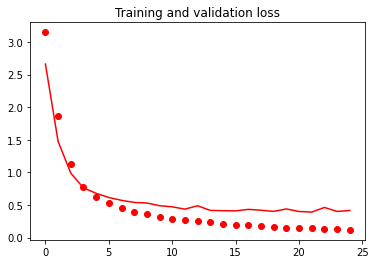

In [27]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')


Text(0.5, 1.0, 'Training and validation accuracy')

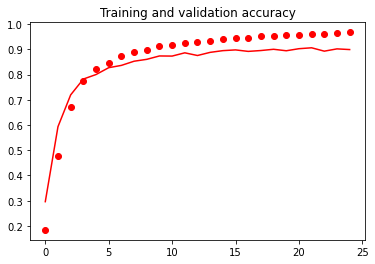

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')


<AxesSubplot:>

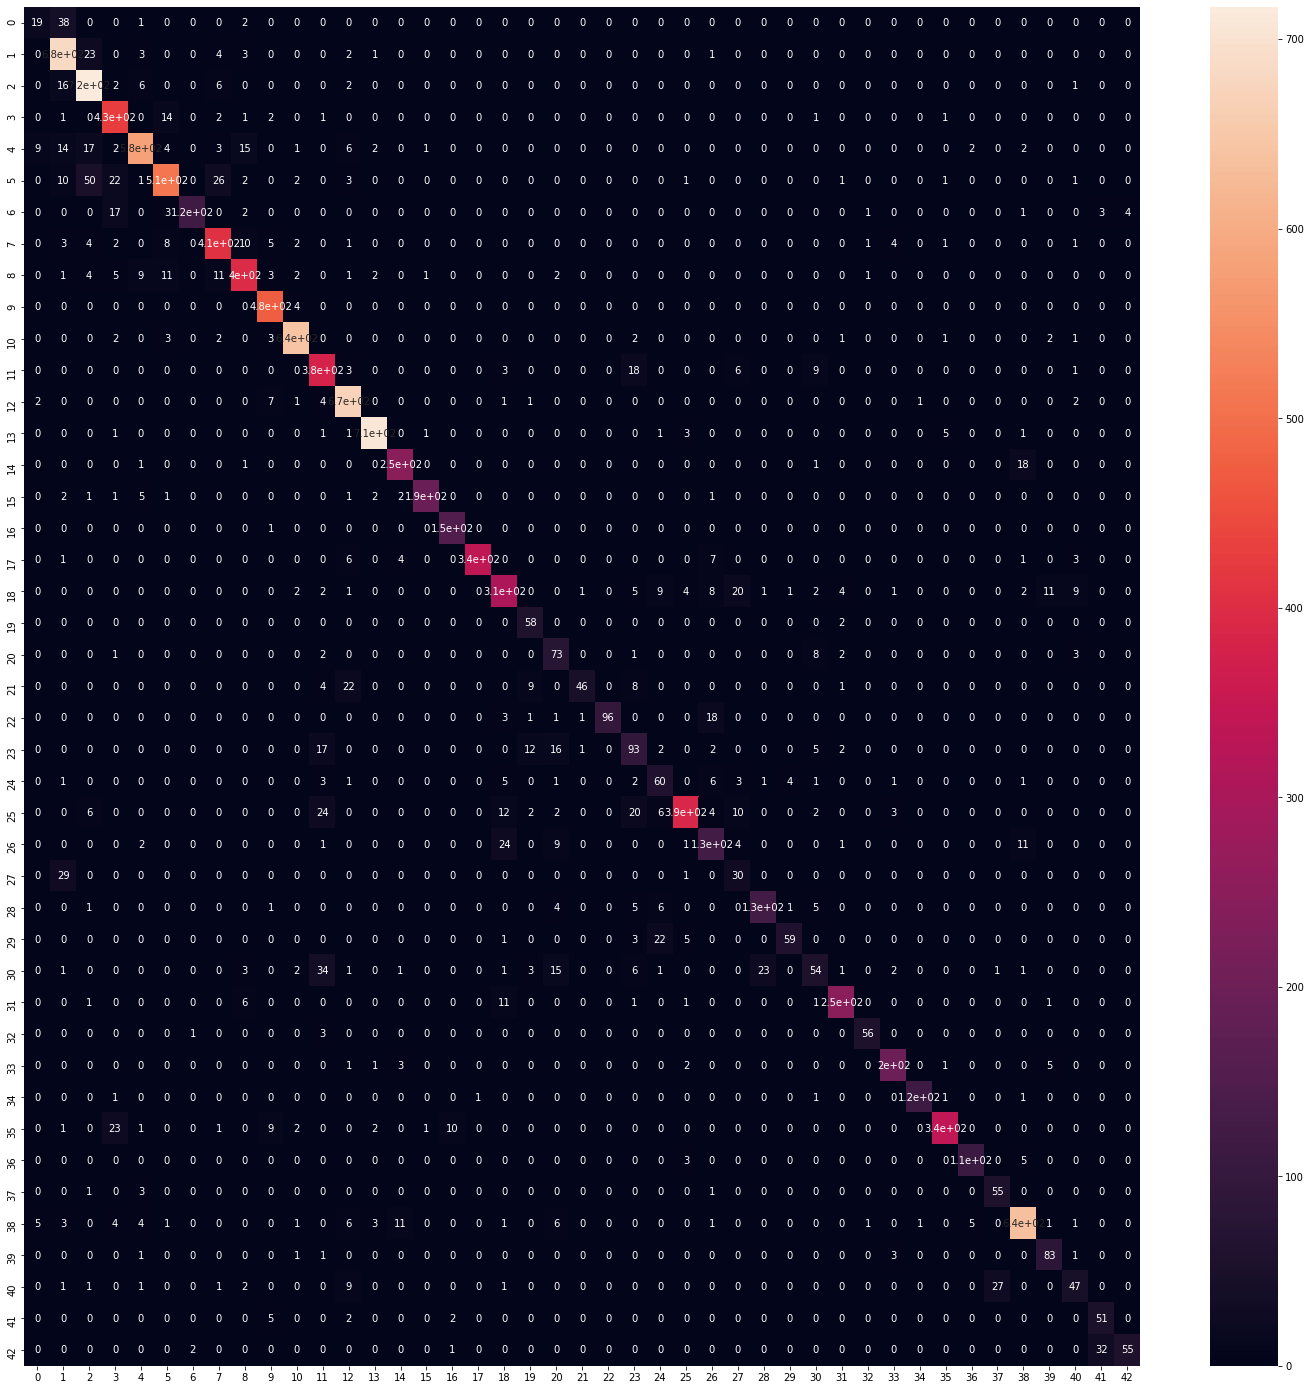

In [29]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

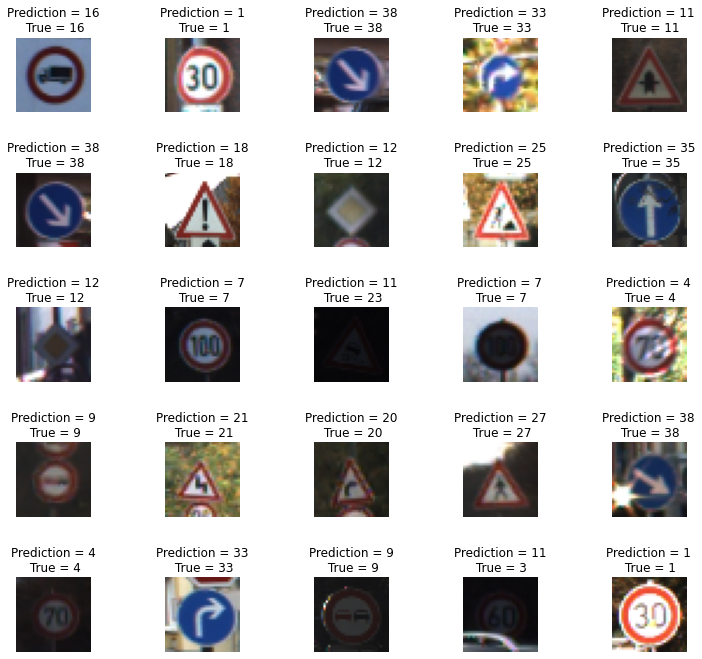

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)